# Homework 4 - Question 1 - Luke Arend

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')

Middleville is a town of families, each with exactly two children. Each child
can have either blue eyes or green eyes, and a family can have any combination of blue-eyed
or green-eyed children. In this problem, you’ll use Matlab to simulate this situation and
compute approximate solutions.

# a) 

Create a function `Bernoulli(alpha,M,N)` that returns an $M$x$N$ matrix of independently
and randomly selected 0s and 1s, where the probability of a 1 is alpha (i.e., the function
should generate $M$x$N$ samples from the Bernoulli distribution with parameter alpha
formatted into a $M$x$N$ matrix).

In [2]:
def bernoulli(alpha, M, N):
    X = np.random.rand(M, N) < alpha
    return X.astype('int')

In [3]:
bernoulli(0.25, 3, 8)

array([[0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]])

# b)

Use your function to generate an example of 10 Middleville families (a 10x2 matrix),
assuming `alpha=0.5`.

In [4]:
families = bernoulli(0.5, 10, 2)
families.T

array([[0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

Compute a vector containing the indices of the families that have
at least one blue-eyed child.

In [5]:
blue_families = np.where(np.sum(families, axis=1) >= 1)[0]
blue_families

array([0, 2, 3, 4, 6, 7, 8])

How many of these are there (as a fraction of the total
number of families)?

In [6]:
frac_blue = len(blue_families) / len(families)
frac_blue

0.7

Do this 50 times, computing the proportion containing at least one
blue-eyed child for each. Plot a histogram of these 50 values. What is the average value? The standard deviation?

In [7]:
def sample_middleville(nfamilies=10, binsize=0.1):
    fracs = []
    for i in range(50):
        families = bernoulli(0.5, nfamilies, 2)
        blue_families = np.where(np.sum(families, axis=1) >= 1)[0]
        frac_blue = len(blue_families) / len(families)
        fracs.append(frac_blue)
    
    print(f"Average value: {np.mean(fracs)}")
    print(f"Standard deviation: {np.std(fracs)}")
    sns.histplot(fracs, binwidth=binsize)
    return np.std(fracs)

Average value: 0.7339999999999999
Standard deviation: 0.13800000000000004


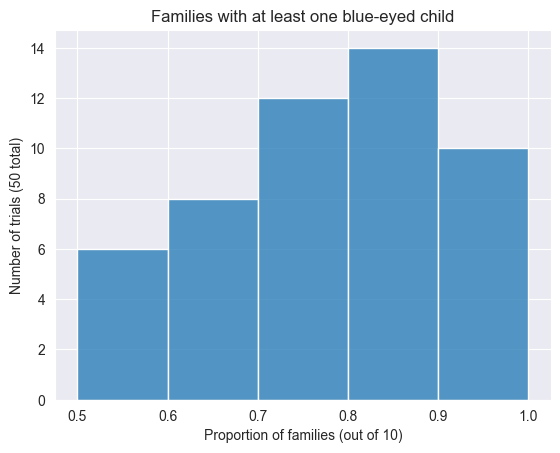

In [8]:
std_10 = sample_middleville(nfamilies=10)
plt.title("Families with at least one blue-eyed child")
plt.ylabel("Number of trials (50 total)")
plt.xlabel(f"Proportion of families (out of 10)")
plt.show()

Now do this all again, but for populations of 40 families, 90
families, and 160 families. What average and standard deviation do you measure for
each of these population sizes?

Population of 40 families:
Average value: 0.759
Standard deviation: 0.06378871373526825

Population of 90 families:
Average value: 0.7388888888888888
Standard deviation: 0.048495895206211545

Population of 160 families:
Average value: 0.7506249999999999
Standard deviation: 0.03460152633916602


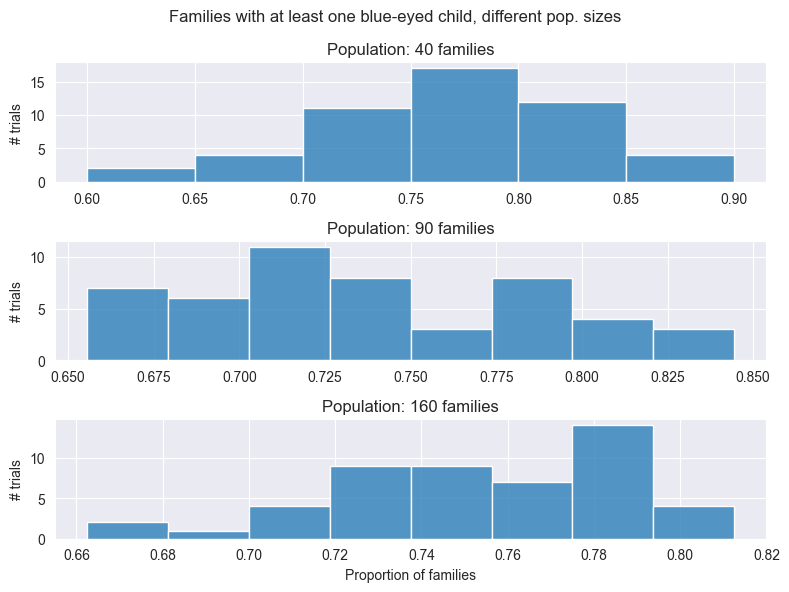

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
plt.suptitle('Families with at least one blue-eyed child, different pop. sizes')
print(f"Population of 40 families:")
plt.sca(axs[0])
std_40 = sample_middleville(40, binsize=0.05)
plt.title('Population: 40 families')
plt.ylabel('# trials')
print(f"\nPopulation of 90 families:")
plt.sca(axs[1])
std_90 = sample_middleville(90, binsize=0.025)
plt.title('Population: 90 families')
plt.ylabel('# trials')
print(f"\nPopulation of 160 families:")
plt.sca(axs[2])
std_160 = sample_middleville(160, binsize=0.02)
plt.title('Population: 160 families')
plt.ylabel('# trials')
plt.xlabel('Proportion of families')
plt.tight_layout()

In general, what happens to the average and standard
deviation as the number of families in the population grows?

As the number of families in the population grows, the **average stays the same** but the **standard deviation drops**.

In [10]:
std = [std_10, std_40, std_90, std_160]
inv_sqrt = 1 / np.sqrt([10, 40, 90, 160])
inv_sqrt / std

array([2.29150555, 2.47871251, 2.17357067, 2.28478191])

In particular, the standard deviation is inversely proportional to the square root of the sample size.

# c)

Now consider conditional probability $P[A|B]$ where the event $A$ is ”the family has one
or more green-eyed child” and the event $B$ is ”the family has one or more blue-eyed
child”. What is the value of this (again, assuming `alpha=0.5`). Now estimate this from a
simulated population (as in previous part), in two different ways. First, find the indices
of all families satisfying $B$, make a new matrix containing these, and then compute the
proportion of these that satisfy $A$.

In [11]:
def estimate_method_1(alpha, nfamilies):
    families = bernoulli(alpha, nfamilies, 2)
    B_inds = np.where(np.sum(families, axis=1) >= 1)[0]
    B_families = families[B_inds, :]
    AB_inds = np.where(np.sum(B_families, axis=1) <= 1)[0]
    frac = len(AB_inds) / len(B_families)
    return frac

Average value: 0.6616904761904762
Standard deviation: 0.15997689368460546


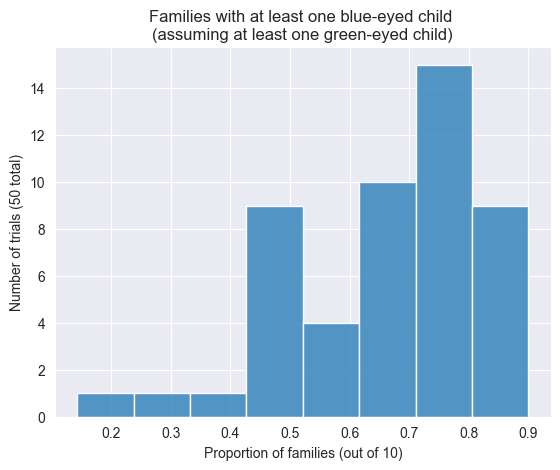

In [12]:
fracs = []
for i in range(50):
    frac = estimate_method_1(alpha=0.5, nfamilies=10)
    fracs.append(frac)

print(f"Average value: {np.mean(fracs)}")
print(f"Standard deviation: {np.std(fracs)}")

sns.histplot(fracs, binwidth=0.1)
plt.title("Families with at least one blue-eyed child \n(assuming at least one green-eyed child)")
plt.ylabel("Number of trials (50 total)")
plt.xlabel(f"Proportion of families (out of 10)")
plt.show()

In [13]:
estimate_method_1(alpha=0.5, nfamilies=100)

0.6756756756756757

In [14]:
estimate_method_1(alpha=0.5, nfamilies=1000)

0.6640419947506562

In [15]:
estimate_method_1(alpha=0.5, nfamilies=10000)

0.6705616783959634

By running on various size populations we see that **method 1 estimates $P[A|B] \approx 0.67$**.

Second, use the definition of conditional probability:
count the number of families satisfying both $A$ and $B$, and then dividing by the number
satisfying $B$. Convince yourself that these compute the same value by running them both
on some large populations. As in 1B, run one of these methods on 50 populations of 10
families, and plot a histogram of the estimated values. Re-compute for a population of
10,000 families.

In [16]:
def estimate_method_2(alpha, nfamilies):
    families = bernoulli(alpha, nfamilies, 2)
    both_inds = np.where(np.sum(families, axis=1) == 1)[0]
    B_inds = np.where(np.sum(families, axis=1) >= 1)[0]
    # both_inds = set(A_inds) & set(B_inds)
    frac = len(both_inds) / len(B_inds)
    return frac

In [17]:
estimate_method_2(alpha=0.5, nfamilies=100)

0.6

In [18]:
estimate_method_2(alpha=0.5, nfamilies=1000)

0.6431535269709544

In [19]:
estimate_method_2(alpha=0.5, nfamilies=10000)

0.6667111051859752

By running on various size populations we see that **method 2 also estimates $P[A|B] \approx 0.67$**.